# Weekly assignment 1: Exploratory Data Analysis

## Introduction

For this assignment, we are going to explore data from activity trackers. Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. For a study in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.

This data is stored in two files named steps.csv and survey.csv. I will clean and merge this data. Then I will perform an analysis on the mean steps per participant, and an analysis on the relation between mean steps per participant and two categorial variables.

In [1]:
import pandas as pd
import statistics as st
import seaborn as sb
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

steps_data = pd.read_csv("steps.csv", delimiter=";")
survey_data = pd.read_csv("survey.csv")

In [2]:
# merge the steps and survey dataset on id
steps_and_survey_data = survey_data.merge(steps_data, on="id")

In [3]:
# Get the mean steps per participant
steps_and_survey_data["mean_steps"] = steps_and_survey_data.loc[:, "20-6-2013":].mean(axis=1)

mean_steps = steps_and_survey_data[(steps_and_survey_data["mean_steps"] <= 30000) & 
                                   (steps_and_survey_data["weight"] < 700) &
                                   (steps_and_survey_data["weight"] > 40)]

mean_steps.head() 

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


I removed all records that contain steps over 30000 because it is not feasible for a person to walk that much in a day.
I removed all records where the weight is 700 or higher because this weight is pretty much impossible
I removed all records where the weight is lower than 40 because this weight is unrealisticly low

## Distribution

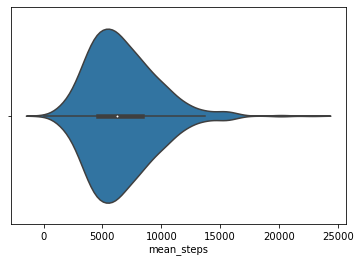

In [4]:
# Create graph of distribution as violinplot
distribution = sb.violinplot(x=mean_steps["mean_steps"])

In [5]:
mean_steps["mean_steps"].mean()

6687.2434354504485

In [6]:
mean_steps["mean_steps"].median()

6237.488

In [7]:
mean_steps["mean_steps"].var()

8587556.78372082

In [8]:
mean_steps["mean_steps"].std()

2930.4533409902333

In [9]:
mean_steps["mean_steps"].max()

22842.716845878138

In [10]:
st.mode(mean_steps["mean_steps"])

10205.521212121212

We can see in the violinplot that most variation is in the range of 5000 to 10000. The data skews to the right. There are a couple outliers but they are plausible. The mean is 6687 and the median is 6237 which seem to be in line on where most values are. The most frequent value present is 10205. the highest value is 22842 and is an outlier.

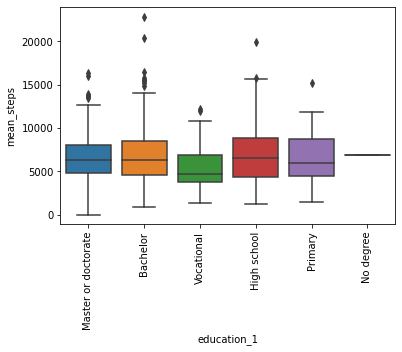

In [11]:
relation_education = sb.boxplot(y="mean_steps", x="education_1", data=mean_steps)
relation_education.tick_params(axis="x", rotation=90)

This graph shows the mean steps per participant based on the education level of said participant. from this graph we can see that across all education levels the mean steps are all around the range of 5000 to 10000 mean steps. With vocational education level being a little lower than the others.

for the rest there is little variation between the educational levels. The median is pretty much the same except for the vocational education level. Furthermore there are a couple of outliers present mainly in the doctorate and bachelor education levels.

I see no relation between the educational level of a particpant and how many steps the participant takes in a day.

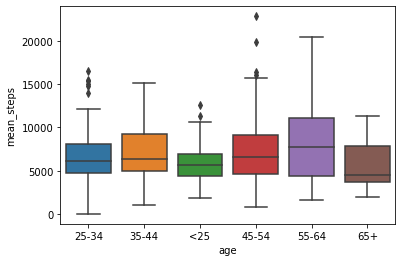

In [12]:
relation_age = sb.boxplot(y="mean_steps", x="age", data=mean_steps)

This graph shows the mean steps per participant based on age. We can see from the graph participants from the age of 55 to 64 have the most variety of steps.
after that the variety of steps seems to go down again. We can see that people in older age categories tend to walk more than younger age categories. There could be a relation between age and mean steps.

## correlation

In [13]:
mean_steps_01 = mean_steps[["weight", "height", "mean_steps"]]

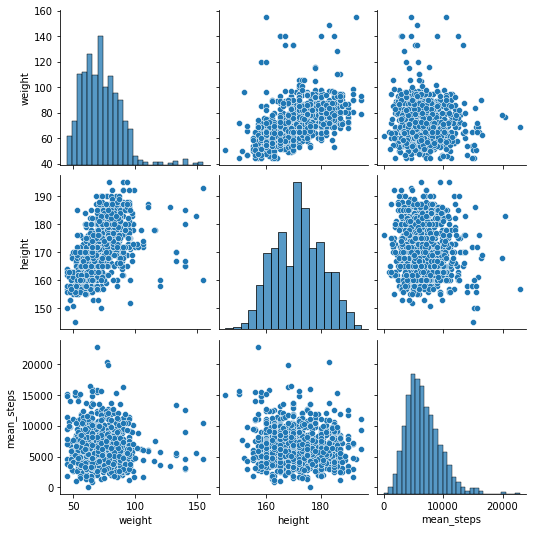

In [14]:
scatterplot_matrix = sb.pairplot(mean_steps_01)

Here we can see that there is no correlation between mean steps and weight and height. There is however a weak correlation between weight and height.

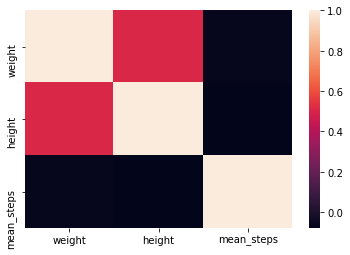

In [15]:
correlation_heatmap = sb.heatmap(mean_steps_01.corr())

From the correlation matrix we can see that there is virtually no correlation between mean steps and weight and height. We do see a slight correlation between height and weight but that is to be expected.

## Linear regression

Linear regression is a type of predictive analysis. the goal of linear regression is to examine whether predictor variables adequatly predict a dependable variable. It is also used to determine which predictor variables hold a more significant role in determining the outcome of a dependent variable, and in which way they impact the dependant variable.

First we will create two datasets. One with the independent variables and one with the dependable variable

In [16]:
# Create dataset with independent variables
mean_steps_categorial = mean_steps[["city", "gender", "age", "education_1"]]

# Create dataset with dependable variable
mean_steps_means = mean_steps["mean_steps"]

mean_steps_categorial.head()

,city,gender,age,education_1
0,Bordeaux,Male,25-34,Master or doctorate
1,Lille,Male,35-44,Bachelor
2,Montpellier,Male,25-34,Master or doctorate
3,Lyon,Male,<25,Bachelor
4,Montpellier,Female,25-34,Bachelor


We will now convert these categorial variables to dummy variables

In [17]:
# Create dummy variables
dummies = pd.get_dummies(mean_steps_categorial)
# Remove redundant dummy variables
dummies = dummies.drop(columns=["gender_Female"])

dummies.head()

,city_Bordeaux,city_Lille,city_Lyon,city_Montpellier,gender_Male,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


Now that our dummy variables are created, I will split them into train and test data

In [18]:
x = dummies
y = mean_steps_means

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)

I splitted the data 60/40, 60% training set 40% test set. I also set a random state so that the result stays effectively the same.

Now I will start fitting a linear regression model to predict the mean_steps data. I used the training data for this model

In [19]:
# Create an empty model
lm = LinearRegression()

# fit the model with the training data
lm = lm.fit(x_train, y_train)

First I will predict the mean_steps and then calculate the R^2 score and the RMSE

In [20]:
y_test_p = lm.predict(x_test)
r2_score(y_test, y_test_p)

-0.006161430522332978

In [21]:
math.sqrt(mean_squared_error(y_test, y_test_p))

2847.547166971414

So we get an R2 of 0.00% and an RMSE of 2848. The R2 indicates that 0.00% of changes in steps is due to city, gender, age or education which is really bad. The RMSE is 2848, which is the average error in prediction. This does not sound too bad since most participants have steps between 5000 and 10000.

Now we will get the residuals

In [22]:
residuals = y_test - y_test_p

Text(0, 0.5, 'mean_steps (predicted)')

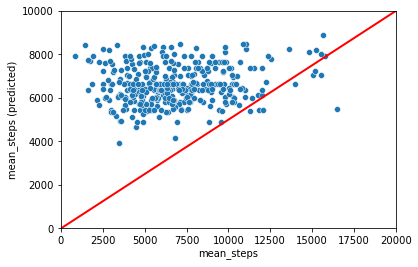

In [23]:
sb.scatterplot(x=y_test, y=y_test_p)
plt.xlim(0, 20000)
plt.ylim(0, 10000)
plt.plot([0, 20000], [0,10000], color="red", lw=2)
plt.xlabel("mean_steps")
plt.ylabel("mean_steps (predicted)")

Text(0, 0.5, 'residuals (mean_steps)')

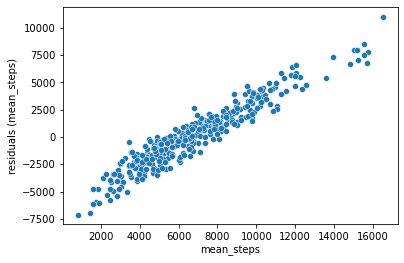

In [31]:
sb.scatterplot(x=y_test, y=residuals)
plt.xlabel("mean_steps")
plt.ylabel("residuals (mean_steps)")

From the residuals we can see that the model predicts too low when the mean_steps are low, and predicts too high when the mean_steps are high. The least amount of error seems to be within the range of 5000 and 8000 mean_steps.

## Conclusion

Based on the R^2 we can predict 0.00% of the mean_steps based on city, gender, age and education. Our typical prediction is off by 2848 steps. From the Y-Y' plot and the residual plot we can see that low mean_steps are predicted too low or too high and high mean_steps are predicted too low. Medium high steps are predicted with the least amount of error. The model would not be suitable to get a good indication on how many steps a person makes.